In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
import os

from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
import matplotlib.colors as clr
import statsmodels.api as sm
import itertools as it
import pandas as pd
from io import StringIO 
from astropy.io import ascii
import math
import random
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
import scipy
from scipy.stats import kde
from scipy.ndimage import gaussian_filter
from matplotlib.path import Path
import os
from gala.coordinates import MagellanicStreamNidever08
import matplotlib.image as mpimg
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
pix={}

In [3]:
for filename in os.listdir('/Users/amymiller/sync_bm/research/DELVE/datafiles/delvemc_blue_splits/'):
    
    #print(filename)
    
    fx = fitsio.FITS('/Users/amymiller/sync_bm/research/DELVE/datafiles/delvemc_blue_splits/'+filename)

    
    #print(filename[13:18])
    
    pix[filename[13:18]]=fx[1].read()


In [4]:
import healpy as hp
#nside=32, then the pixel value
print(hp.get_all_neighbours(32, 11812))

[11871 11811 11748 11681 11749 11813 11872 11927]


In [10]:
def plot(ID,ra,dec,sig):
    
    fig, ax = plt.subplots(figsize=(11,11))
    
    neigh = hp.get_all_neighbours(32, int(ID))
    
    ra1 = np.array(pix[ID]['ra'])
    dec1 = np.array(pix[ID]['dec'])
    
    for i in neigh:
        ra1 = np.concatenate((ra1,pix[str(i)]['ra']))
        dec1 = np.concatenate((dec1,pix[str(i)]['dec']))
    
    h2=ax.hist2d(ra1,dec1,bins=500,cmap='Greys',vmin=0.1,vmax=40)
    ax.set_xlabel('ra',fontsize=20)
    ax.set_ylabel('dec',fontsize=20)
    #ax.scatter(ra,dec,color='r',s=50,facecolors='none', edgecolors='jet')
    im = ax.scatter(ra,dec,c=sig,s=20,cmap='jet')
    plt.colorbar(im,ax=ax)
    ax.set_title(ID,fontsize=20)
    #c=t, cmap="cmap_name_r"
    '''for i in range(0,len(sig)):
        print(ra[i])
        print(dec[i])
        print(sig[i])'''
        
        #ax.annotate(str(np.round(sig[i],decimals=0)),(ra[i],dec[i]),color='r',size=20)
    #ax.scatter(28.77,-68.25,color='g',s=50,facecolors='none', edgecolors='g')
    

In [11]:
import pandas as pd
df=pd.read_csv('/Users/amymiller/sync_bm/research/DELVE/out_tables/out_11812.csv', sep=',',header=None)
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

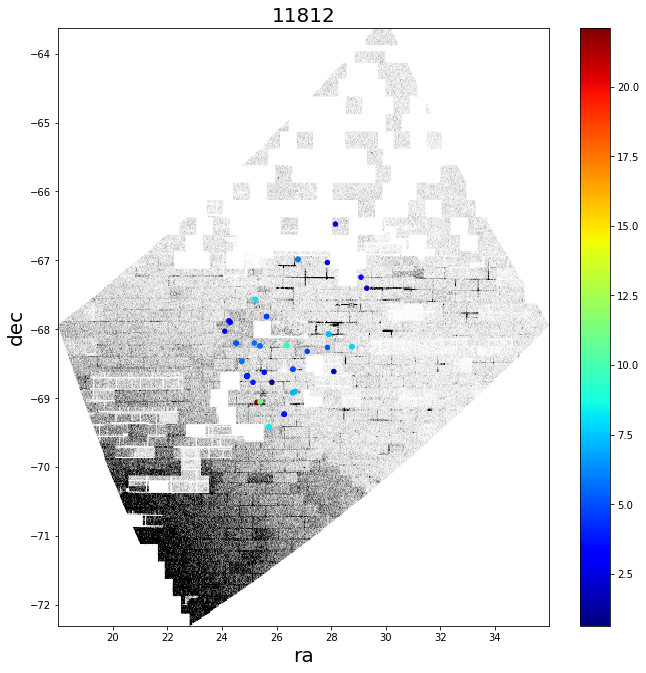

In [12]:
plot('11812',df[1].values,df[2].values,df[0].values)

above 5 is good, above 20 might be bad. CCDs were like 30

label plot with sig. value

In [13]:
df2=pd.read_csv('/Users/amymiller/sync_bm/research/DELVE/out_tables/out_11927.csv', sep=',',header=None)
df2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

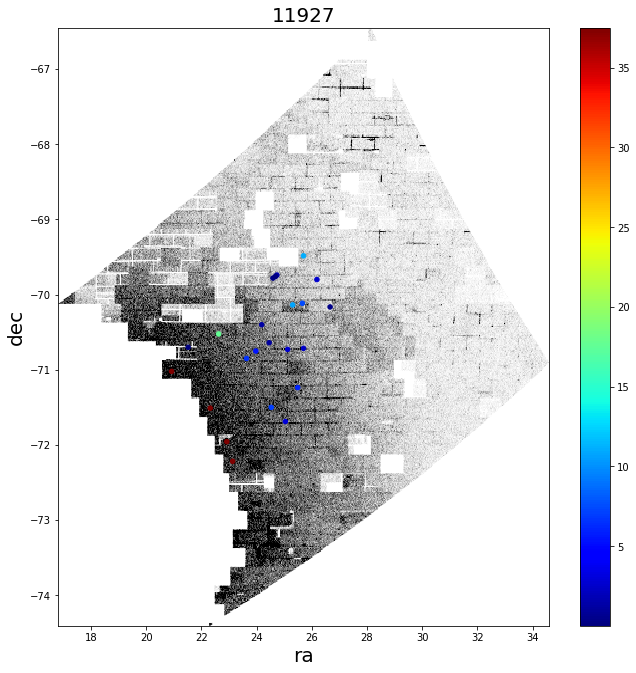

In [15]:
plot('11927',df2[1].values,df2[2].values,df2[0].values)

In [17]:
def plot2(ID,ra,dec,sig):
    
    fig, ax = plt.subplots(figsize=(9,7))
    
    neigh = hp.get_all_neighbours(32, 11812)
    
    '''ra1 = np.array(pix[ID]['ra'])
    dec1 = np.array(pix[ID]['dec'])
    
    for i in neigh:
        ra1 = np.concatenate((ra1,pix[str(i)]['ra']))
        dec1 = np.concatenate((dec1,pix[str(i)]['dec']))'''
    
    h2=ax.hist2d(pix[ID]['ra'],pix[ID]['dec'],bins=500,cmap='Greys',vmin=0.1,vmax=10)
    ax.set_xlabel('ra',fontsize=20)
    ax.set_ylabel('dec',fontsize=20)
    #ax.scatter(ra,dec,color='r',s=50,facecolors='none', edgecolors='jet')
    im = ax.scatter(ra,dec,c=sig,s=40,cmap='jet')
    plt.colorbar(im,ax=ax)
    ax.set_title(ID,fontsize=20)
    #c=t, cmap="cmap_name_r"
    '''for i in range(0,len(sig)):
        print(ra[i])
        print(dec[i])
        print(sig[i])'''
        
        #ax.annotate(str(np.round(sig[i],decimals=0)),(ra[i],dec[i]),color='r',size=20)
    #ax.scatter(28.77,-68.25,color='g',s=50,facecolors='none', edgecolors='g')
    

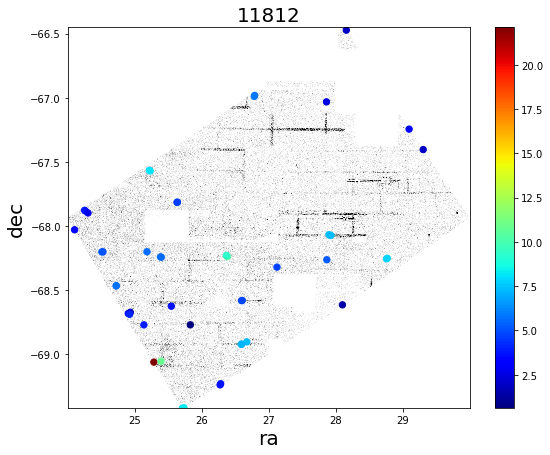

In [18]:
plot2('11812',df[1].values,df[2].values,df[0].values)